# Linear regression in diabetes dataset

Exploremos los conjuntos de datos incluidos en esta biblioteca de Python. Estos conjuntos de datos se han limpiado y formateado para su uso en algoritmos de ML.

## Ej 1: Carga y explora el dataset diabetes de sklearn 

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## A partir de la descripción de los datos, responda a las siguientes preguntas:

1. ¿Cuántos atributos hay en los datos? ¿Qué significan?

1. ¿Cuál es la relación entre `diabetes['data']` y `diabetes['target']`?

1. ¿Cuántos registros hay en los datos?


## Ahora explora lo que contiene la parte *data* así como la parte *target* de `diabetes`. 

Scikit-learn normalmente toma arrays numpy 2D como entrada (aunque también se aceptan dataframes pandas). Inspeccione la forma de `data` y `target`. Confirme que son consistentes con la descripción de los datos.

## Realiza un EDA de los datos

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [7]:
x=pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])
y=pd.DataFrame(diabetes["target"], columns=["target"])

In [9]:
x #Data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [10]:
y #Target

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [14]:
df=pd.concat([x,y], axis=1)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [18]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


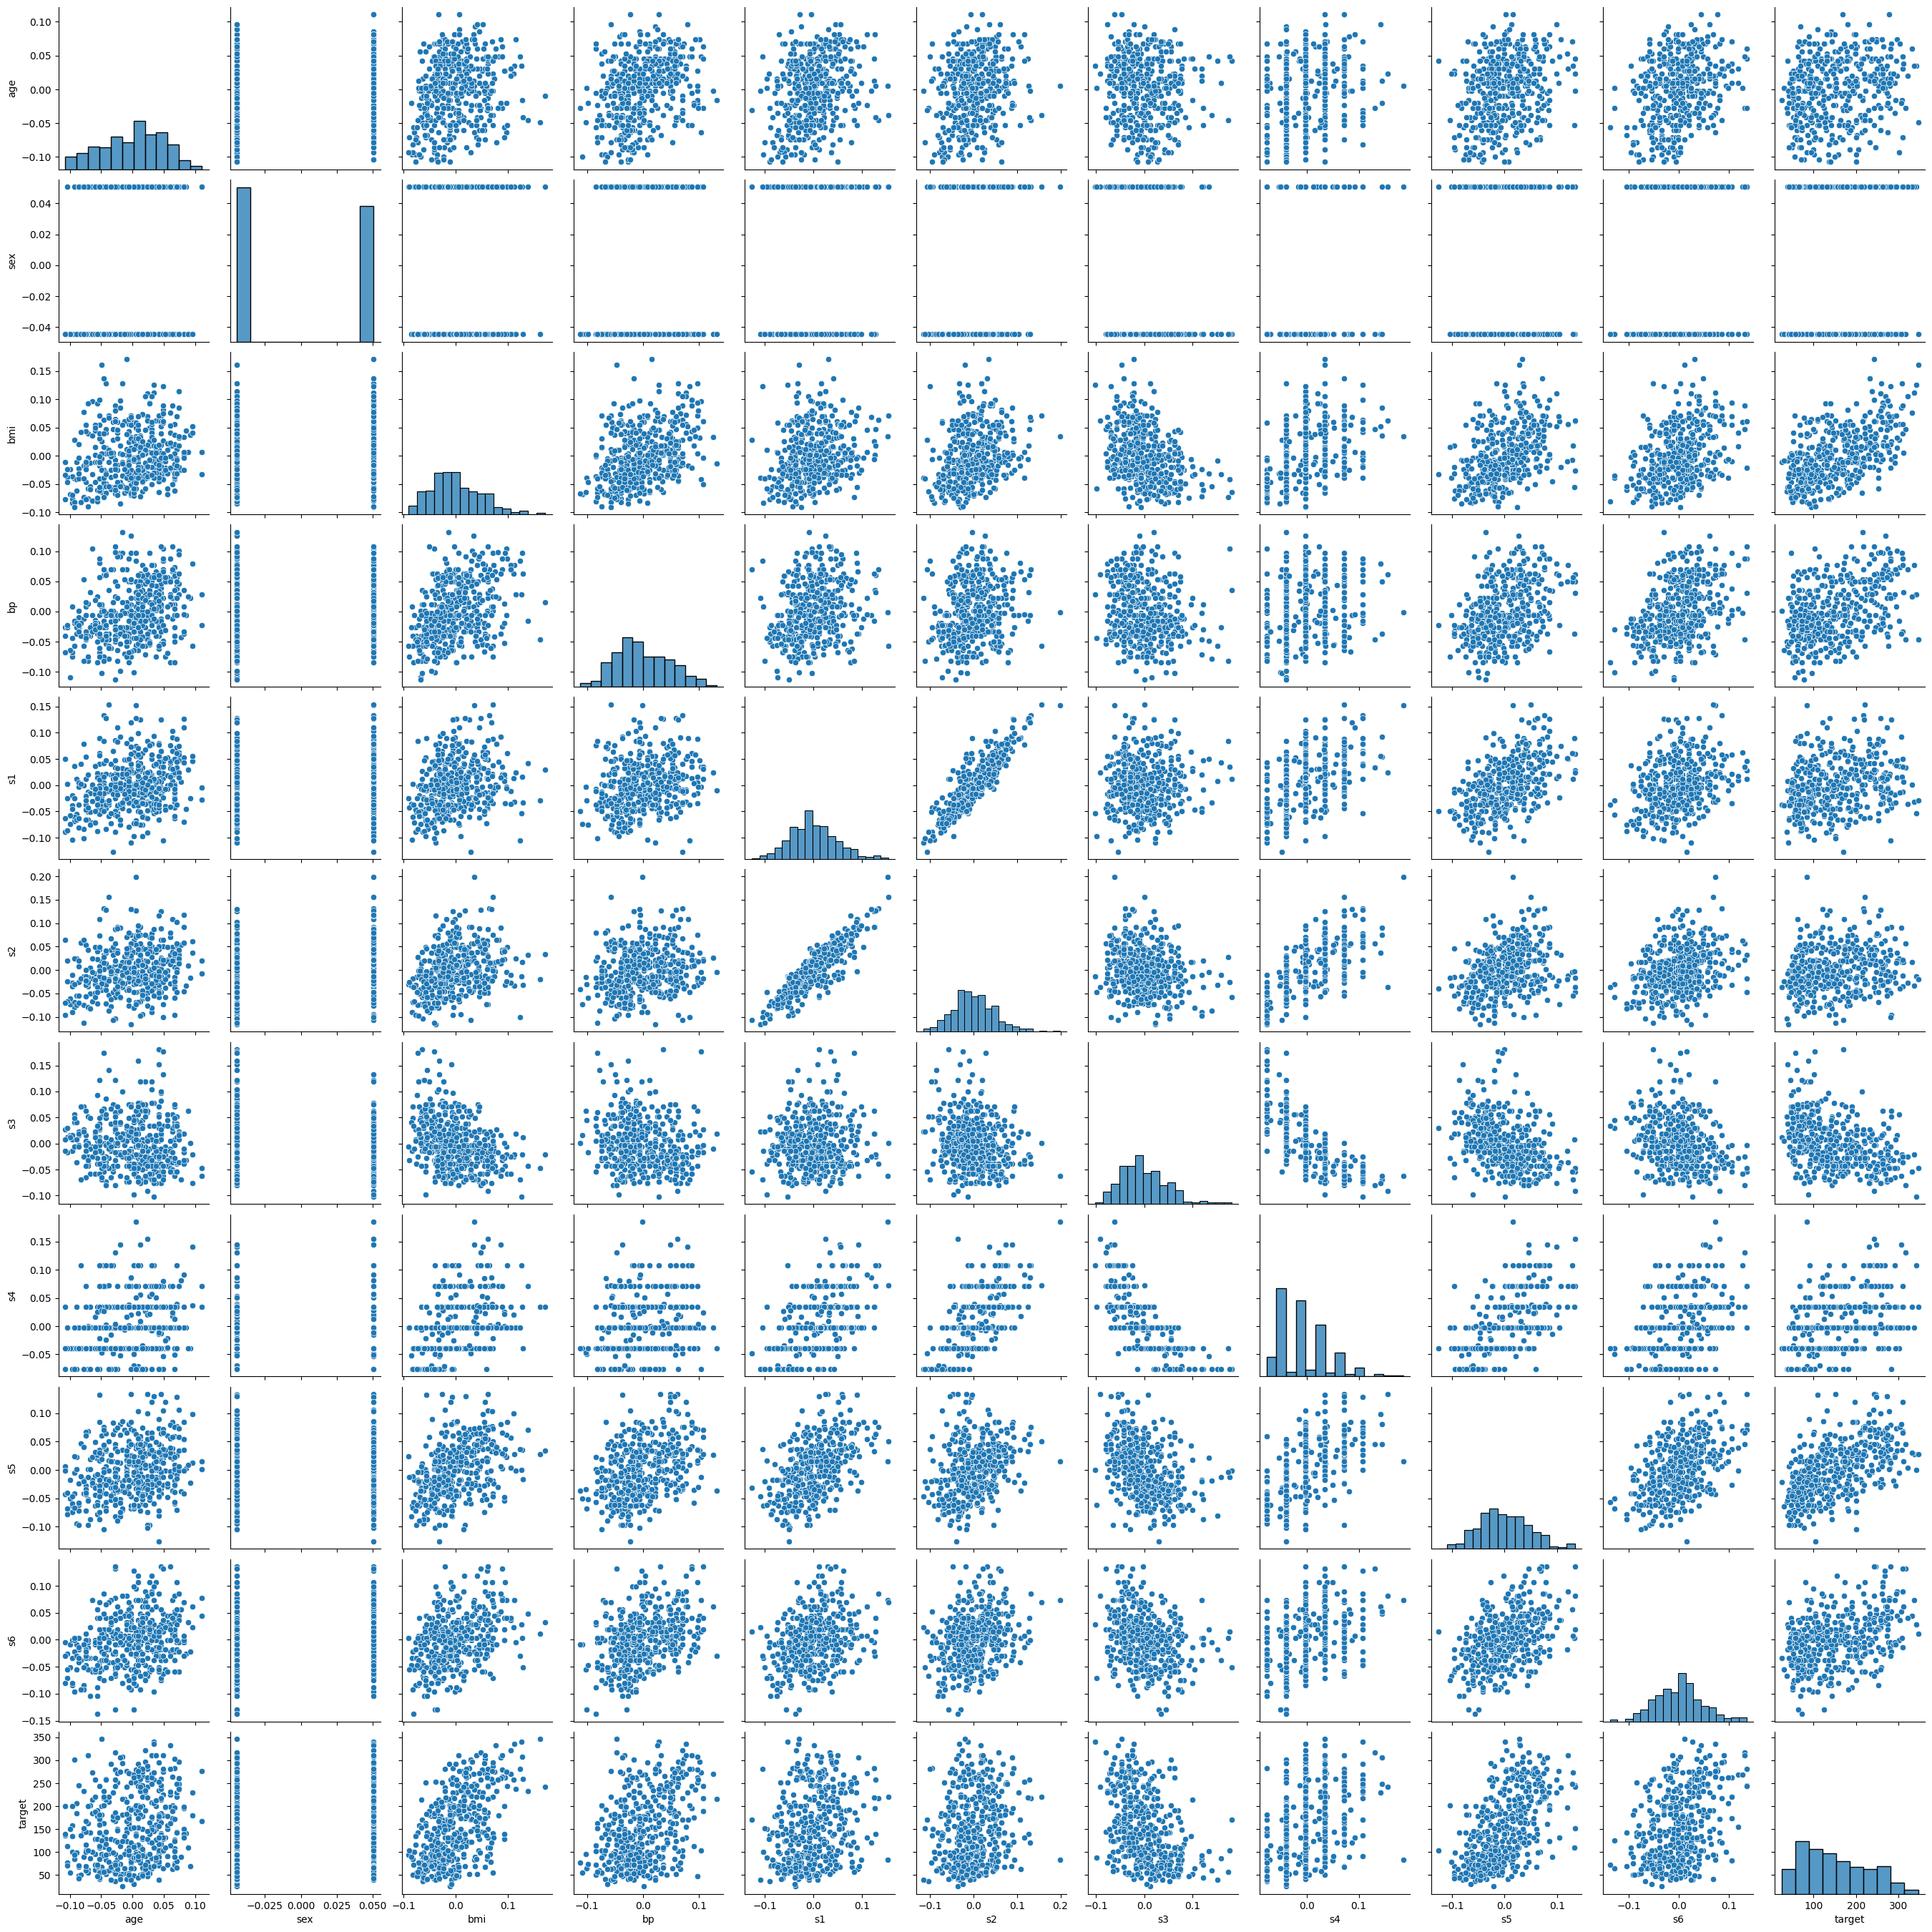

In [19]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

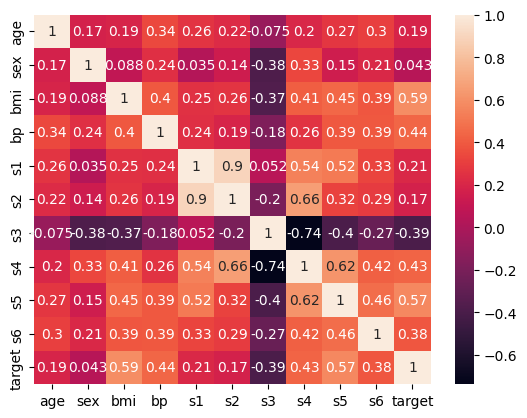

In [24]:
corr=df.corr()
sns.heatmap(corr, annot=True)

## Construye un modelo 

1. Crea un modelo de regresión lineal.
2. Parte los datos en conjuntos de entrenamiento y test. Usa las ultimas 20 filas para los datos de test.
3. Entrena el modelo. Muestra los parametros del modelo.
4. Realiza una predicción con los datos de test

In [30]:
from sklearn.linear_model import LinearRegression
#Separar entre train y test manualmente
model=LinearRegression()
X_train=x.iloc[:-20]
X_test=x.iloc[-20:]

y_train=y.iloc[:-20]
y_test=y.iloc[-20:]

In [32]:
#otra forma de separar entre train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=20, shuffle=True, random_state=0)
#shuffle es que los mezcle

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
model.coef_

array([[ -32.3074285 , -257.44432972,  513.31945939,  338.46656647,
        -766.86983748,  455.85416891,   92.55795582,  184.75163454,
         734.92318647,   82.7231425 ]])

In [43]:
#Ordenada en el origen es el valor de nuestra variable cuando todas las x valen 0
model.intercept_

array([152.39189054])

<BarContainer object of 10 artists>

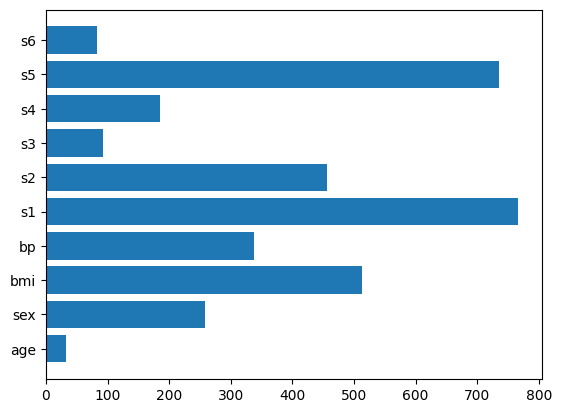

In [50]:
import matplotlib.pyplot as plt
plt.barh(y=X_train.columns, width=abs(model.coef_.reshape(-1)))

In [51]:
df_coefs=pd.DataFrame(model.coef_, columns=X_train.columns).T
df_coefs.columns=["coefs"]
df_coefs["coefs_abs"]=df_coefs.abs()
df_coefs.sort_values(by="coefs_abs")


,coefs,coefs_abs
age,-32.307428,32.307428
s6,82.723143,82.723143
s3,92.557956,92.557956
s4,184.751635,184.751635
sex,-257.444330,257.444330
bp,338.466566,338.466566
s2,455.854169,455.854169
bmi,513.319459,513.319459
s5,734.923186,734.923186
s1,-766.869837,766.869837


##  Pinta las predicciones y comparalas con los datos de test

In [60]:
y_hat=model.predict(X_test)
y_hat

array([[234.91268666],
       [246.81516246],
       [163.46097649],
       [120.06270322],
       [189.53954944],
       [252.25245557],
       [115.07963579],
       [187.68358635],
       [143.4612258 ],
       [229.33399798],
       [165.99154864],
       [177.21160898],
       [104.80161901],
       [ 87.82117953],
       [244.00359837],
       [ 87.32023836],
       [158.46413277],
       [ 68.10147768],
       [100.25018353],
       [225.64805295]])

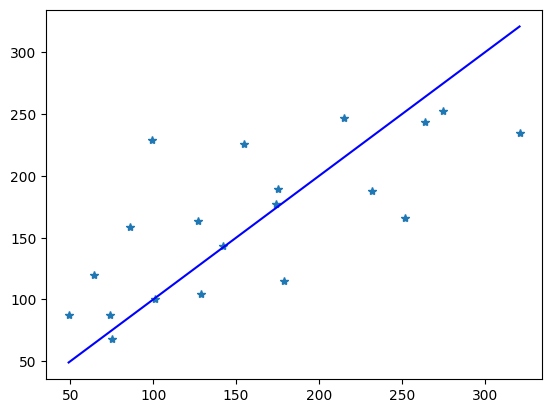

In [68]:

x=np.linspace(y_test.min(), y_test.max())
plt.plot(y_test, y_hat, "*")
plt.plot(x,x,"b")

## Calcula y visualiza los errores

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

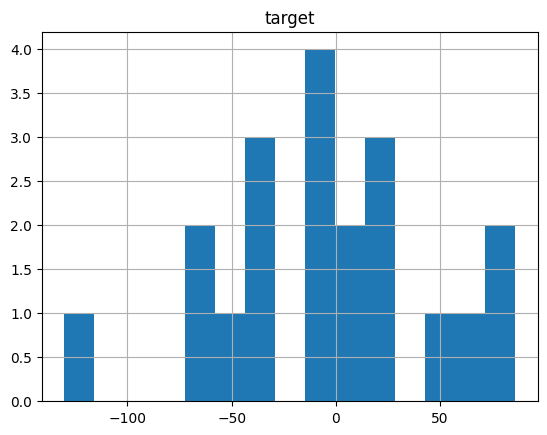

In [73]:
#Calculamos residuo
res= y_test-y_hat
res.hist(bins=15)

In [75]:
res.describe()

,target
count,20.000000
mean,-5.710781
std,54.461040
min,-130.333998
25%,-36.925792
50%,-2.336417
75%,23.110254
max,86.087313


In [89]:
mse=np.mean(res **2).values
print("MSE:",mse[0])

rmse=np.sqrt(mse)
print("MSE:",rmse[0])

mae=np.mean(np.abs(res), axis=0)
print("MSE:",mae[0])

MSE: 2850.317691752578
MSE: 53.38836663312129
MSE: 41.2031018198325


In [102]:
corr_sol=np.corrcoef(y_hat.squeeze(), y_test.squeeze())
corr_sol=corr_sol[0,1]
corr_sol

0.7254599327586352

In [108]:
r_2=corr_sol**2
r_2

0.5262921140381634

In [110]:
r_2=1-mse/np.var(y)
r_2[0]

0.519330013768452